# Comparación de Modelos: Regresión Logística vs Árbol de Decisión (Python)

# En esta clase realizaremos una comparación entre dos modelos de clasificación binaria: Regresión Logística (Logit) y Árbol de Decisión, usando el dataset de créditos.

## Paso 1: Importar Librerías

In [ ]:
import numpy as np  # Biblioteca para cálculos numéricos y manejo de arrays multidimensionales
import pandas as pd  # Librería para análisis y manipulación de datos en estructuras tipo tabla (DataFrame)
import matplotlib.pyplot as plt  # Herramienta para generar gráficos en 2D como líneas, barras y dispersión
import seaborn as sns  # Biblioteca basada en matplotlib para visualizaciones estadísticas más atractivas

from sklearn.datasets import load_breast_cancer  # Carga el dataset de creditos de sklearn
from sklearn.model_selection import train_test_split  # Divide el dataset en conjuntos de entrenamiento y prueba
from sklearn.linear_model import LogisticRegression  # Importa el modelo de regresión logística (logit)
from sklearn.tree import DecisionTreeClassifier  # Importa el modelo de árbol de decisión

from sklearn.metrics import (  # Métricas para evaluar el rendimiento de los modelos
    confusion_matrix,         # Crea la matriz de confusión: TP, FP, FN, TN
    classification_report,    # Genera métricas como precisión, recall y F1-score
    roc_curve,                # Calcula la curva ROC (tasa de verdaderos positivos vs falsos positivos)
    auc,                      # Calcula el área bajo la curva ROC (AUC)
    RocCurveDisplay           # Herramienta para graficar la curva ROC fácilmente

## Paso 2: Cargar y Explorar los Datos

In [ ]:
# Cargar el dataset de cáncer de mama desde sklearn
data = pd.read_csv("C:\\Users\\LILI\\\Downloads\\datos_credito_bogota_millones.csv")  
data.columns = ['Ingresos_Mensuales', 'Monto_deuda_actual','label']
data.head() # Devuelve un objeto tipo diccionario con datos, etiquetas y metadatos

# Convertimos los datos (features) a un DataFrame de pandas y asignamos nombres de columnas
X = data[['Ingresos_Mensuales', 'Monto_deuda_actual']]  # X contiene las 30 variables predictoras (características)
X2 = data['Ingresos_Mensuales']
# Extraemos la variable objetivo (0 = aprobado, 1 = no aprobado) y la guardamos como una Serie de pandas
y = data[['label']]  # y contiene los diagnósticos de cada muestra


# Mostramos estadísticas descriptivas del DataFrame X: media, desviación, percentiles, min y max de cada variable
print(X.describe())

# Contamos cuántos ejemplos hay de cada clase (0: aprbado, 1: benno aprobadoigno)
print(y.value_counts())  # Útil para detectar si el dataset está balanceado

       Ingresos_Mensuales  Monto_deuda_actual
count          100.000000          100.000000
mean             6.553200            5.301600
std              3.998836            2.389373
min              1.600000            1.200000
25%              2.860000            3.570000
50%              4.600000            4.960000
75%             10.250000            7.000000
max             14.000000           12.000000
label
0        50
1        50
Name: count, dtype: int64


# 📊 Dataset de Evaluación Crediticia

Este conjunto de datos simula evaluaciones de crédito en base a ingresos y deudas mensuales. Es ideal para practicar modelos de clasificación binaria

---

## 🧬 Información general

- **Número de muestras**:  100
- **Número de características (variables)**: 2
- **Variable objetivo (target)**: Aprobación del crédito
  - `0`: **Crédito no aprobado**
  - `1`: **Crédito aprobado**

---

## 🎯 Variable Objetivo: `target`

| Valor | Diagnóstico crediticio        |
|-------|---------------------|
| 0     | Crédito denegado (no aprobado) |
| 1     | Crédito aprobado |

---

## 🔠 Descripción de las Variables Predictoras

Cada variable se calcula a partir de una imagen digitalizada de una muestra de tejido.  
Para 10 atributos básicos, se generan 3 tipos de métricas:
- **Media (`mean`)**
- **Error estándar (`error`)**
- **Peor valor (`worst`)**

---

### 🔟 Atributos Básicos

| Atributo         | Descripción                                                                 |
|------------------|-----------------------------------------------------------------------------|
| Ingresos_Mensuales           | Ingreso mensual declarado por el solicitante (en millones de COP)     |
| Monto_deuda_actual        | Total de deuda mensual actual (en millones de COP)                     |


---

## 📋 Lista completa de variables

### ➤ Variables tipo `mean` (promedios)
- `mean radius`
- `mean texture`
- `mean perimeter`
- `mean area`
- `mean smoothness`
- `mean compactness`
- `mean concavity`
- `mean concave points`
- `mean symmetry`
- `mean fractal dimension`

### ➤ Variables tipo `error` (error estándar)
- `radius error`
- `texture error`
- `perimeter error`
- `area error`
- `smoothness error`
- `compactness error`
- `concavity error`
- `concave points error`
- `symmetry error`
- `fractal dimension error`

### ➤ Variables tipo `worst` (valores más extremos)
- `worst radius`
- `worst texture`
- `worst perimeter`
- `worst area`
- `worst smoothness`
- `worst compactness`
- `worst concavity`
- `worst concave points`
- `worst symmetry`
- `worst fractal dimension`

---

## 📈 Aplicaciones del dataset

Este dataset es ideal para:
- Modelos de clasificación binaria
- Comparar algoritmos como:
  - Regresión Logística
  - Árboles de Decisión


---


In [3]:
X.head()

,Ingresos_Mensuales,Monto_deuda_actual
0,4.8,1.2
1,1.6,2.0
2,14.0,4.8
3,3.2,8.0
4,10.0,2.4


## Paso 3: Particionar los Datos

La partición de los datos en conjuntos de entrenamiento y prueba es fundamental en machine learning porque permite evaluar de forma objetiva la capacidad del modelo para generalizar a datos nuevos. Si un modelo se entrena y evalúa sobre el mismo conjunto, corre el riesgo de memorizar los datos (sobreajuste) en lugar de aprender patrones reales. Al separar un subconjunto exclusivo para prueba, se simula cómo se comportaría el modelo en un entorno real, garantizando que las métricas obtenidas reflejen su verdadero desempeño. Además, usar una semilla aleatoria asegura que esta división sea reproducible, lo que es esencial para comparar modelos de manera justa y transparente.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

## Paso 4: Entrenar los Modelos

### Por qué es importante usar semillas 

Asegura que la partición sea reproducible.
Si tú o un estudiante corre el código varias veces, obtendrán el mismo resulatdo
Ideal para clases, investigación o pruebas controladas.

In [5]:
# 🔹 Modelo de Regresión Logística (Logit)
log_model = LogisticRegression(max_iter=10000)  
# Creamos el modelo logístico. Se establece max_iter=10000 para asegurar que el algoritmo converge,
# especialmente cuando hay muchas variables o los datos requieren más iteraciones.

log_model.fit(X_train, y_train) # Entrenamos el modelo usando los datos de entrenamiento. Aquí el modelo "aprende" la relación entre las variables X e y.
y_pred_log = log_model.predict(X_test)  # Generamos predicciones de clase (0 o 1) sobre el conjunto de prueba. Esto es lo que el modelo cree que es la clase verdadera.

y_proba_log = log_model.predict_proba(X_test)[:, 1]  # Obtenemos las probabilidades predichas de que la clase sea "1" (benigno). 
# Esto se usa para calcular curvas ROC, métricas de umbral, etc.

# 🔸 Modelo de Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)  # Creamos el árbol de decisión. Usamos random_state para que los resultados sean reproducibles.
tree_model.fit(X_train, y_train)  # Entrenamos el árbol con los datos de entrenamiento. El árbol genera reglas basadas en divisiones de los datos.

y_pred_tree = tree_model.predict(X_test)  
# Realizamos predicciones de clase (0 o 1) sobre los datos de prueba usando el árbol entrenado.

y_proba_tree = tree_model.predict_proba(X_test)[:, 1]  
# Extraemos la probabilidad predicha de que la clase sea "1". 
# Igual que en el logit, esto sirve para métricas como AUC o análisis de umbrales de decisión.

c:\Users\WALTER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Paso 5: Curvas ROC y AUC

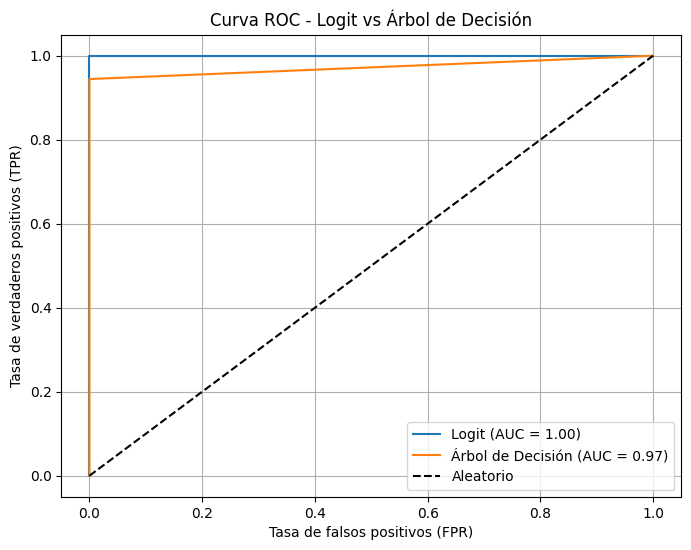

In [ ]:
# Calcular los puntos para la curva ROC del modelo Logit
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)  # Falsos positivos y verdaderos positivos para cada umbral
roc_auc_log = auc(fpr_log, tpr_log)  # Área bajo la curva ROC para el modelo logit

# Calcular los puntos para la curva ROC del modelo Árbol de Decisión
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_proba_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Crear una sola figura para mostrar ambas curvas ROC
plt.figure(figsize=(8, 6))

# Dibujar curva ROC para el modelo Logit
plt.plot(fpr_log, tpr_log, label=f"Logit (AUC = {roc_auc_log:.2f})")

# Dibujar curva ROC para el modelo Árbol
plt.plot(fpr_tree, tpr_tree, label=f"Árbol de Decisión (AUC = {roc_auc_tree:.2f})")

# Agregar línea diagonal de referencia (modelo aleatorio)
plt.plot([0, 1], [0, 1], 'k--', label="Aleatorio")

# Configurar la gráfica
plt.title("Curva ROC - Logit vs Árbol de Decisión")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# Este código compara visualmente el desempeño de dos modelos de clasificación binaria:
#  uno de regresión logística (logit) y otro de árbol de decisión, 
# usando la Curva ROC como herramienta de evaluación


In [ ]:
#  La curva ROC muestra claramente que ambos modelos —el logit y el árbol de decisión— tienen un desempeño sobresaliente:
# 🟦 Logit (AUC = 1.00): separación perfecta entre clases. El modelo es capaz de distinguir sin errores entre créditos aprobados y no aprobados, sin importar el umbral.
# 🟧 Árbol de Decisión (AUC = 0.97): también excelente. Tiene una ligera curva más alejada del ángulo superior izquierdo en comparación al logit, pero sigue siendo un modelo altamente preciso.
# Aunque ambos modelos son muy buenos, el Logit tiene una curva que alcanza el punto (0,1) de forma más directa, lo que indica una mejor capacidad de discriminación entre clases
# La línea negra punteada representa un modelo que adivina al azar (AUC = 0.5).
# Las curvas de ambos modelos están muy por encima de esta línea, lo que confirma que ambos modelos aprenden patrones reales en los datos.
# El Árbol de Decisión también es muy competitivo y podría ser preferido si se busca interpretabilidad o robustez frente a ruido
# El modelo Logit tiene un rendimiento perfecto, pero esto debe ser verificado con datos nuevos para asegurar que no esté sobreajustado.


## Paso 6: Matriz de Confusión y Métricas

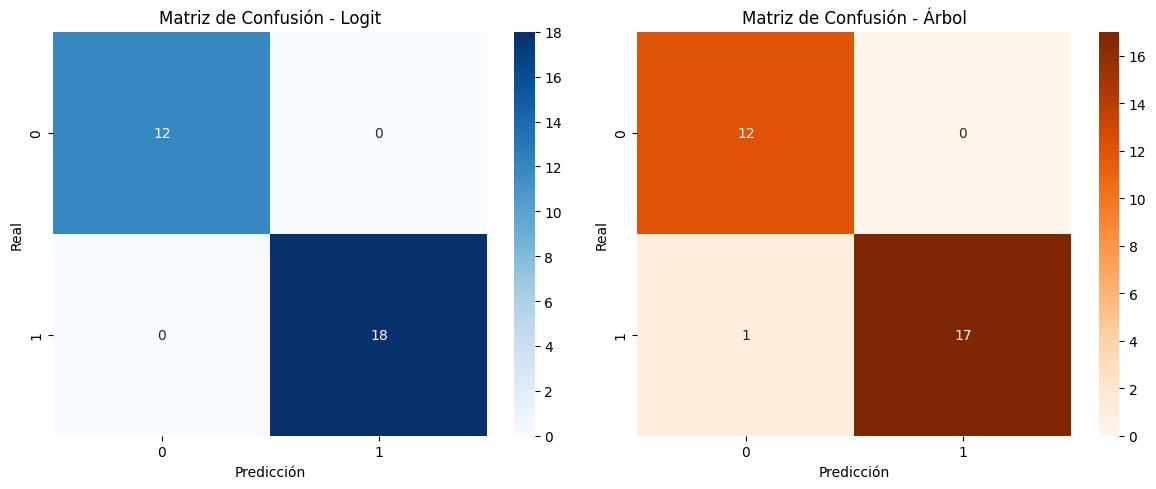

In [6]:
conf_log = confusion_matrix(y_test, y_pred_log)
conf_tree = confusion_matrix(y_test, y_pred_tree)

report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_log, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Matriz de Confusión - Logit")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Real")

sns.heatmap(conf_tree, annot=True, fmt="d", cmap="Oranges", ax=ax[1])
ax[1].set_title("Matriz de Confusión - Árbol")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Real")

plt.tight_layout()
plt.show()

In [ ]:
#🟦 Matriz de Confusión – Logit
#TP = 18, TN = 12, FP = 0, FN = 0
# El modelo de regresión logística clasificó todos los casos correctamente. No cometió errores, ni rechazó a clientes aprobables ni aprobó a clientes no elegibles.
# Esto confirma lo que ya habías visto con el AUC de 1.00: separación perfecta entre clases en el conjunto de prueba.
#🟧 Matriz de Confusión – Árbol de Decisión
# TP = 17, TN = 12, FP = 0, FN = 1
# El árbol cometió un único error: rechazó por error a un cliente que sí debía ser aprobado.
# Aunque su rendimiento sigue siendo muy alto, esto se ve reflejado en el AUC ligeramente menor (0.97).


## Paso 7: Comparación de Métricas en Tabla

In [7]:
df_comp = pd.DataFrame({
    "Métrica": ["Accuracy", "Precision clase 1", "Recall clase 1", "F1-score clase 1", "F1-score macro"],
    "Logit": [
        report_log["accuracy"],
        report_log["1"]["precision"],
        report_log["1"]["recall"],
        report_log["1"]["f1-score"],
        report_log["macro avg"]["f1-score"]
    ],
    "Árbol de Decisión": [
        report_tree["accuracy"],
        report_tree["1"]["precision"],
        report_tree["1"]["recall"],
        report_tree["1"]["f1-score"],
        report_tree["macro avg"]["f1-score"]
    ]
})

print(df_comp)

             Métrica  Logit  Árbol de Decisión
0           Accuracy    1.0           0.966667
1  Precision clase 1    1.0           1.000000
2     Recall clase 1    1.0           0.944444
3   F1-score clase 1    1.0           0.971429
4     F1-score macro    1.0           0.965714


In [ ]:
#El modelo de regresión logística mostró un rendimiento impecable, con un 100 % de exactitud,
#  sensibilidad y precisión en la detección de solicitudes de crédito aprobadas. El árbol de decisión, 
# si bien también tuvo un rendimiento sobresaliente, presentó una leve caída en sensibilidad y F1-score, 
# producto de un falso negativo en las predicciones

In [ ]:
## Conclusión

# El modelo **logit** es más estable y con menor tasa de falsos negativos.
# El **árbol de decisión** puede capturar relaciones no lineales pero es más propenso al sobreajuste.
# Ambos modelos son útiles dependiendo del contexto.**

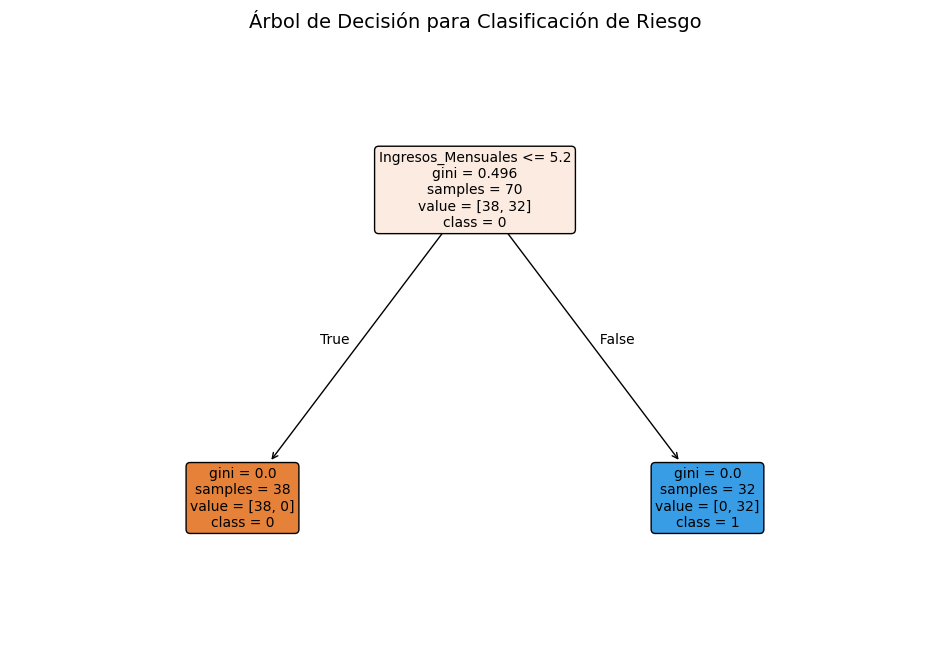

In [2]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
 
# Cargar tu archivo CSV
data = pd.read_csv("C:\\Users\\LILI\\Downloads\\datos_credito_bogota_millones.csv")
data.columns = ['Ingresos_Mensuales', 'Monto_deuda_actual', 'label']
 
# Separar X e y
X = data[['Ingresos_Mensuales', 'Monto_deuda_actual']]
y = data['label']  # Ojo: sin doble corchete para que sea una Serie
 
# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
 
# Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
 
# Visualizar el árbol
plt.figure(figsize=(12, 8))
plot_tree(
    tree_model,
    feature_names=X.columns,         # Usa los nombres reales de tus variables
    class_names=['0', '1'],          # Etiquetas según las clases que tienes
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificación de Riesgo", fontsize=14)
plt.show()

In [ ]:
#Este resultado representa la visualización de un árbol de decisión entrenado sobre tus datos de crédito en Bogotá. El modelo está usando como variable principal los Ingresos Mensuales para clasificar el riesgo (columna label), y tomó una única decisión:
#Si los Ingresos_Mensuales son menores o iguales a 5.2, el modelo predice clase 0.
#Si los Ingresos_Mensuales son mayores a 5.2, el modelo predice clase 1.
#Nodo raíz (el primero):
#Gini = 0.496 → El conjunto está casi balanceado entre clases 0 y 1.
#Se divide con base en Ingresos_Mensuales <= 5.2.
#Rama izquierda (sí cumple la condición):
#Todos los casos (38) son de clase 0 → Gini = 0.0 → homogéneo.
#Rama derecha (no cumple la condición):
#Todos los casos (32) son de clase 1 → también homogéneo.